In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("C:\\Users\\tamil\\OneDrive\\Documents\\Python Directory")

pd.set_option("display.max_rerows",None)
pd.set_option("display.max_columns",None)

folder = "sigma cab/"

In [196]:
train = pd.read_csv(folder+"train.csv")
test = pd.read_csv(folder+"test.csv")

print(f"Train set dim :\n{train.shape}")
print(f"Test set dim :\n{test.shape}")

Train set dim :
(131662, 14)
Test set dim :
(87395, 13)


In [197]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


# Analysing Target Variable

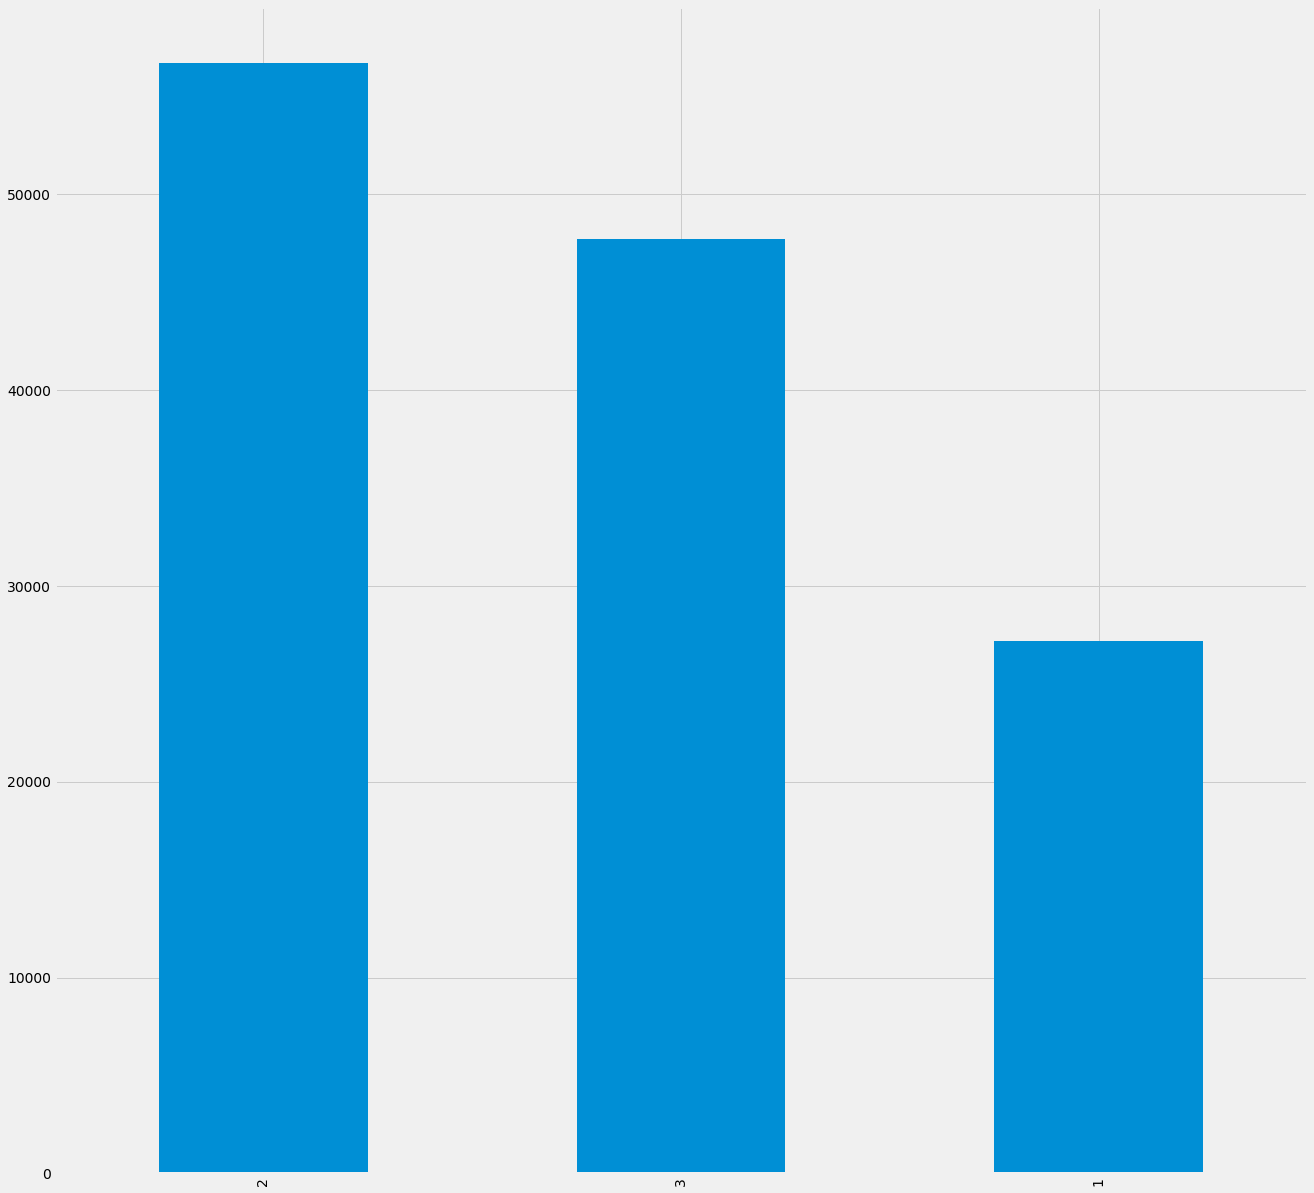

In [198]:
train.Surge_Pricing_Type.value_counts().plot(kind = "bar")
plt.show()

# Little Exploration

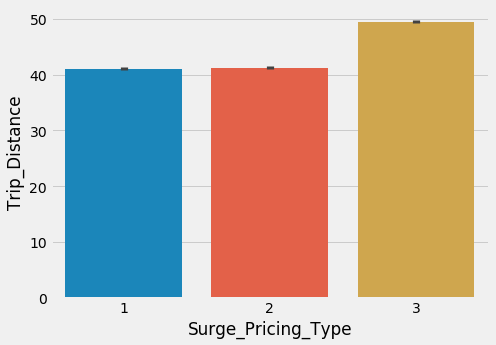

In [199]:
plt.figure(figsize=(7,5))
sns.barplot(train.Surge_Pricing_Type, train.Trip_Distance)
plt.show()

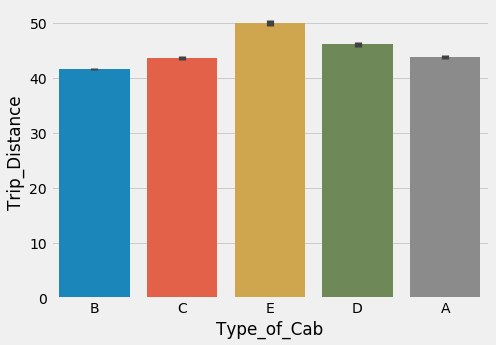

In [200]:
plt.figure(figsize=(7,5))
sns.barplot(train.Type_of_Cab, train.Trip_Distance)
plt.show()

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [202]:
print("Percentage of missing values")
print("============================")

for var in train.columns:
    if train[var].isna().sum() >1:
        miss = np.round(train[var].isna().sum()/train.shape[0] * 100,3)
        print(var, "has {0}% of missing values".format(miss))

Percentage of missing values
Type_of_Cab has 15.35% of missing values
Customer_Since_Months has 4.496% of missing values
Life_Style_Index has 15.337% of missing values
Confidence_Life_Style_Index has 15.337% of missing values
Var1 has 53.949% of missing values


In [203]:
train["Customer_Since_Months"].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

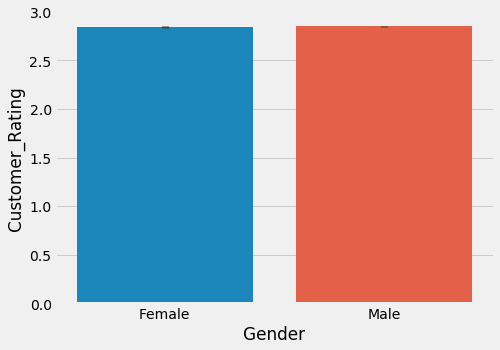

In [204]:
plt.figure(figsize=(7,5))
sns.barplot(train.Gender, train.Customer_Rating)
plt.show()

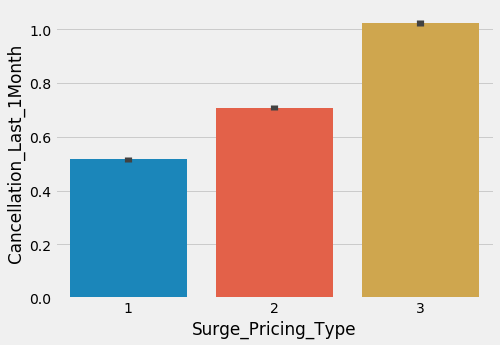

In [205]:
plt.figure(figsize=(7,5))
sns.barplot(train.Surge_Pricing_Type, train.Cancellation_Last_1Month)
plt.show()

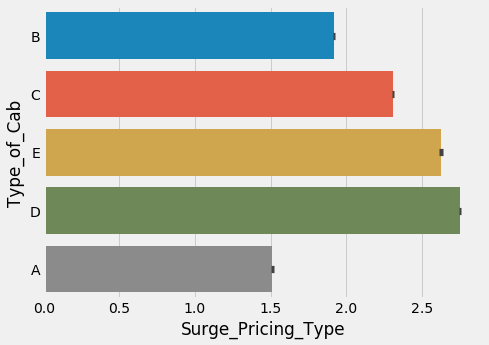

In [206]:
plt.figure(figsize=(7,5))
sns.barplot(train.Surge_Pricing_Type, train.Type_of_Cab)
plt.show()

In [207]:
from scipy.stats import chi2_contingency,chi2

def check_cat_relation(x,y,confidence_interval):
    cross_table = pd.crosstab(x,y,margins=True)
    stat,p,dof,expected = chi2_contingency(cross_table)
    print("Chi_Square Value = {0}".format(stat))
    print("P-Value = {0}".format(p))
    alpha = 1 - confidence_interval
    
    if p > alpha:
        print(">> Accepting Null Hypothesis <<")
        print("There Is No Relationship Between Two Variables")
    else:
        print(">> Rejecting Null Hypothesis <<")
        print("There Is A Significance Relationship Between Two Variables")

# Preprocessing

In [208]:
train_ind = train.drop("Surge_Pricing_Type", axis = 1)
full_data = pd.concat([train_ind,test], axis = 0)
df = full_data.drop(["Trip_ID","Var1"], axis = 1)
print(df.shape)
df.head()

(219057, 11)


,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender
0,6.77,B,1.0,2.42769,A,A,3.90500,0,46,60,Female
1,29.47,B,10.0,2.78245,B,A,3.45000,0,56,78,Male
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,56,77,Male
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,52,74,Male
4,54.95,C,10.0,3.03453,B,A,3.40250,4,49,102,Male


In [209]:
for var in df.columns:
    if df[var].dtype == "float32":
        df[var] = df[var].astype("float16")
        
for var in df.columns:
    if df[var].dtype == "int32":
        df[var] = df[var].astype("int16")

In [210]:
#Extracting Numerical data and discrete data
num_var = [var for var in df.columns if df[var].dtype != "object"]
num_data = df[num_var]
print(num_data.shape)
num_data.head()

(219057, 7)


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
0,6.77,1.0,2.42769,3.90500,0,46,60
1,29.47,10.0,2.78245,3.45000,0,56,78
2,41.58,10.0,NaN,3.50125,2,56,77
3,61.56,10.0,NaN,3.45375,0,52,74
4,54.95,10.0,3.03453,3.40250,4,49,102


In [211]:
cat_data = df.drop(num_data.columns,axis = 1) #Var which is not present in num data will be stored
raw_cat_data = cat_data.copy()
cat_data.head()

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,B,A,A,Female
1,B,B,A,Male
2,NaN,NaN,E,Male
3,C,NaN,A,Male
4,C,B,A,Male


In [212]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Trip_Distance             219057 non-null  float64
 1   Customer_Since_Months     209171 non-null  float64
 2   Life_Style_Index          185537 non-null  float64
 3   Customer_Rating           219057 non-null  float64
 4   Cancellation_Last_1Month  219057 non-null  int64  
 5   Var2                      219057 non-null  int64  
 6   Var3                      219057 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 13.4 MB


In [213]:
num_data["Life_Style_Index"] = num_data["Life_Style_Index"].fillna(num_data["Life_Style_Index"].median())
num_data["Customer_Since_Months"] = num_data["Customer_Since_Months"].fillna(num_data["Customer_Since_Months"].median())

In [214]:
cat_data["Type_of_Cab"] = np.where(cat_data["Type_of_Cab"].isnull(),"Missing",cat_data["Type_of_Cab"])
cat_data["Confidence_Life_Style_Index"] = np.where(cat_data["Confidence_Life_Style_Index"].isnull(),"Missing",cat_data["Confidence_Life_Style_Index"])

In [215]:
check_cat_relation(train["Type_of_Cab"], train["Surge_Pricing_Type"],0.95)

Chi_Square Value = 76126.79267838228
P-Value = 0.0
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


In [216]:
check_cat_relation(train["Confidence_Life_Style_Index"], train["Surge_Pricing_Type"],0.95)

Chi_Square Value = 5446.871123288485
P-Value = 0.0
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


In [217]:
check_cat_relation(train["Destination_Type"], train["Surge_Pricing_Type"],0.95)

Chi_Square Value = 4389.3758068361085
P-Value = 0.0
>> Rejecting Null Hypothesis <<
There Is A Significance Relationship Between Two Variables


In [218]:
check_cat_relation(train["Gender"], train["Surge_Pricing_Type"],0.95)

Chi_Square Value = 2.672026803165324
P-Value = 0.8487401731109667
>> Accepting Null Hypothesis <<
There Is No Relationship Between Two Variables


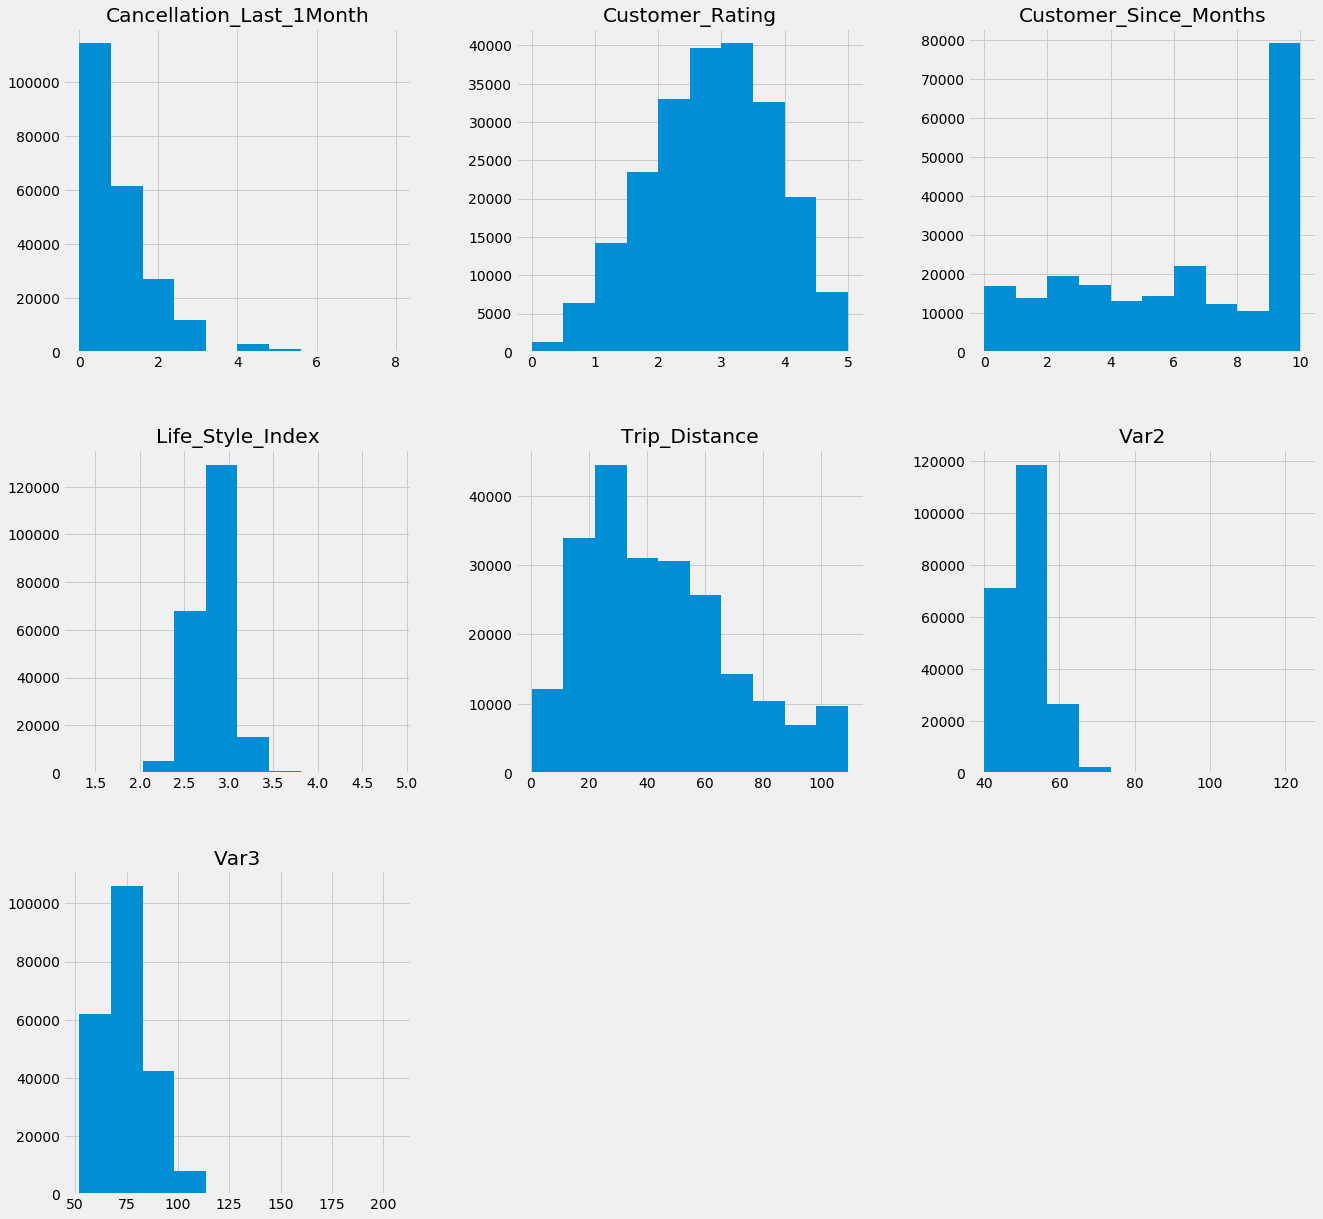

In [219]:
plt.rcParams["figure.figsize"] = 20,20
num_data.hist();

In [220]:
num_data.skew()

Trip_Distance               0.726008
Customer_Since_Months      -0.247014
Life_Style_Index            0.233348
Customer_Rating            -0.192665
Cancellation_Last_1Month    1.544260
Var2                        1.167965
Var3                        0.819039
dtype: float64

# Skew Correction

In [221]:
from scipy.stats import skew
from scipy.stats import yeojohnson,boxcox
from scipy.special import boxcox1p

In [222]:
iy = boxcox1p(num_data["Trip_Distance"],0.15)
skew(iy)

-0.37127695231480706

In [223]:
from scipy.stats import skew
skewed_data = num_data.apply(lambda x: skew(x.dropna()))
skew_in_data = pd.DataFrame(abs(skewed_data),columns = ["Skew"])
skew_in_data.head()

,Skew
Trip_Distance,0.726003
Customer_Since_Months,0.247012
Life_Style_Index,0.233347
Customer_Rating,0.192664
Cancellation_Last_1Month,1.544249


In [224]:
print("There are {} skewed numerical features to Box Cox transform".format(skew_in_data.shape[0]))
temp_data = num_data.copy()
from scipy.special import boxcox1p
lam = 0.15
for var in skew_in_data.index:
    temp_data[var] = boxcox1p(temp_data[var], lam)
temp_data.skew()

There are 7 skewed numerical features to Box Cox transform


Trip_Distance              -0.371279
Customer_Since_Months      -0.919713
Life_Style_Index           -0.024584
Customer_Rating            -0.781397
Cancellation_Last_1Month    0.741422
Var2                        0.830962
Var3                        0.449539
dtype: float64

In [225]:
skew_in_data["Skew_after_boxcox"] = abs(temp_data.skew().values)

In [226]:
skew_in_data["result"] = skew_in_data["Skew"] > skew_in_data["Skew_after_boxcox"]

In [227]:
skew_in_data[skew_in_data["result"]==True].index.shape

(5,)

In [228]:
print("There are {} skewed numerical features to Box Cox transform".format(skew_in_data[skew_in_data["result"]==True].index.shape[0]))

from scipy.special import boxcox1p
lam = 0.15
for var in skew_in_data[skew_in_data["result"]==True].index:
    num_data[var] = boxcox1p(num_data[var], lam)
num_data.skew()

There are 5 skewed numerical features to Box Cox transform


Trip_Distance              -0.371279
Customer_Since_Months      -0.247014
Life_Style_Index           -0.024584
Customer_Rating            -0.192665
Cancellation_Last_1Month    0.741422
Var2                        0.830962
Var3                        0.449539
dtype: float64

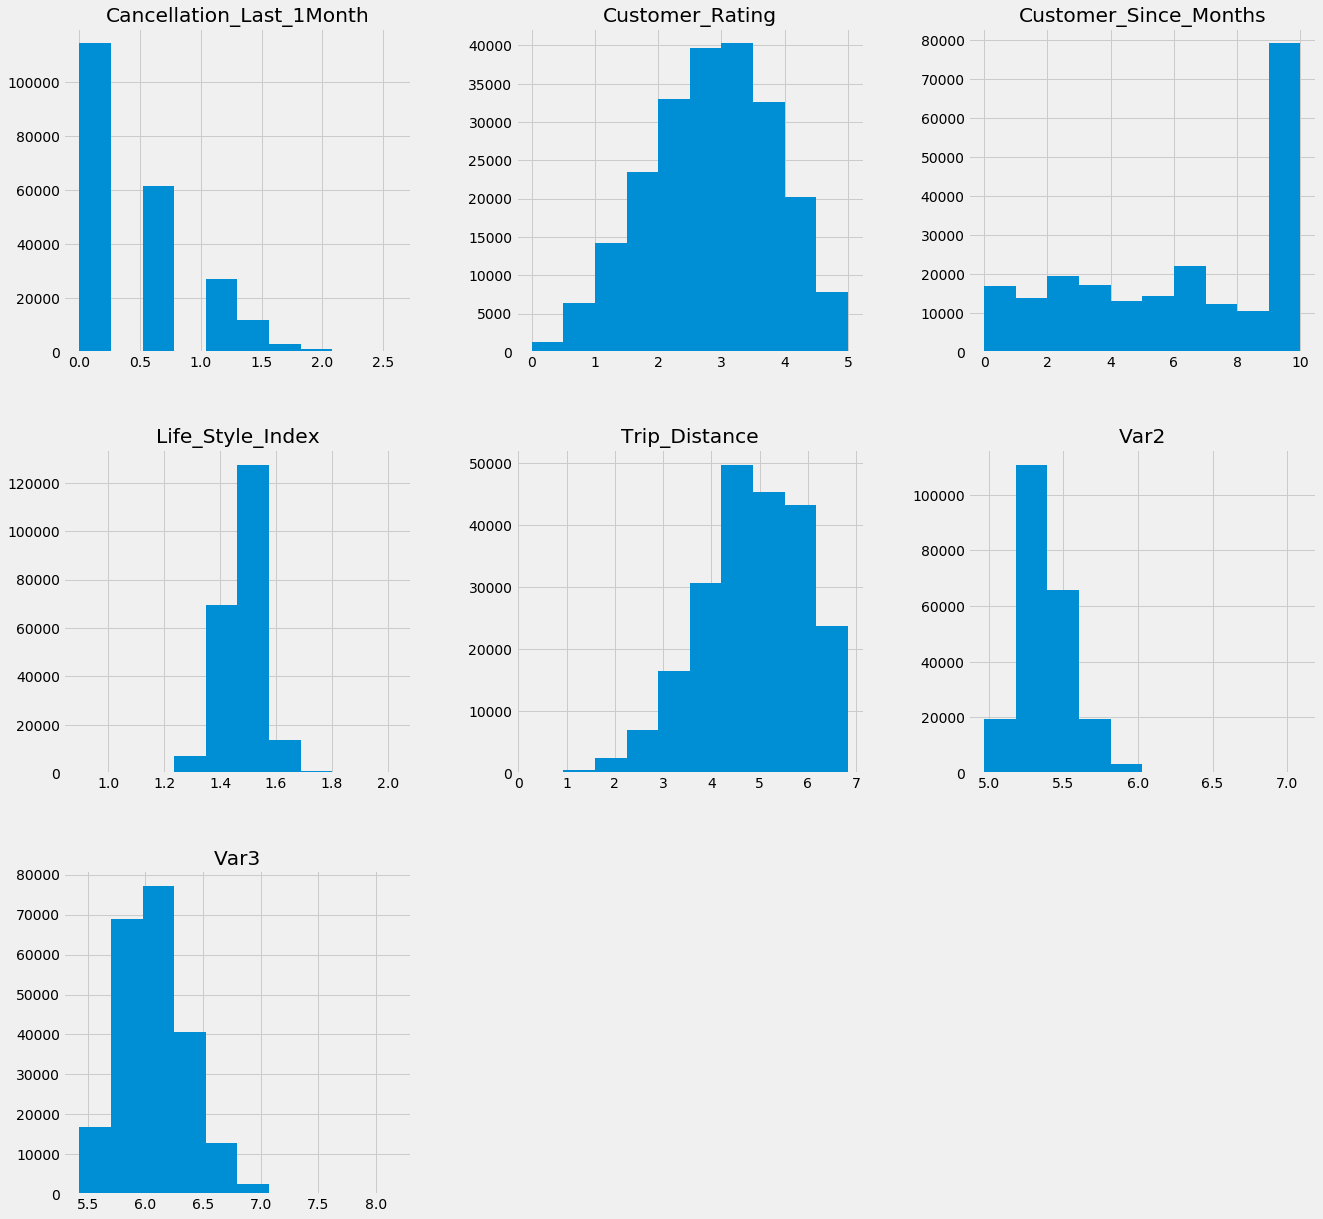

In [229]:
num_data.hist();

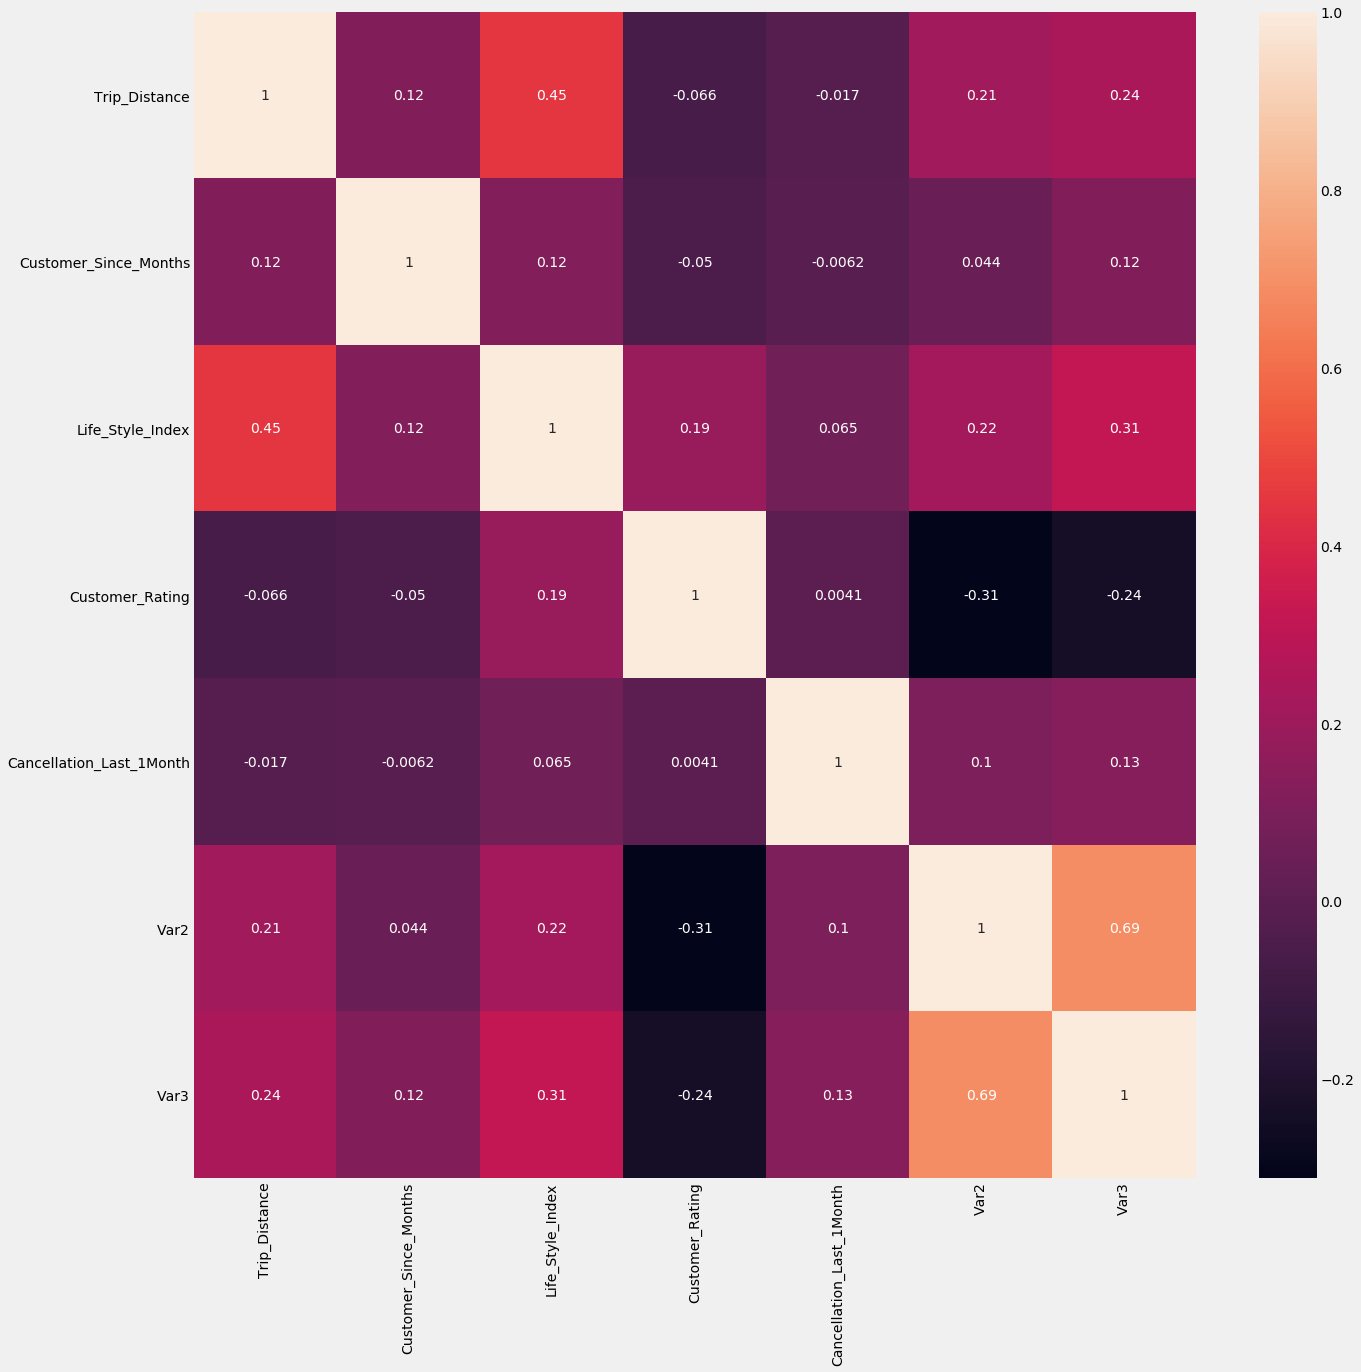

In [230]:
sns.heatmap(num_data.corr(),annot=True);

In [156]:
raw_cat_data.isnull().sum()

Type_of_Cab                    33368
Confidence_Life_Style_Index    33520
Destination_Type                   0
Gender                             0
dtype: int64

In [157]:
raw_cat_data["Type_of_Cab"] = raw_cat_data["Type_of_Cab"].fillna(raw_cat_data["Type_of_Cab"].mode()[0])
raw_cat_data["Confidence_Life_Style_Index"] = raw_cat_data["Confidence_Life_Style_Index"].fillna(raw_cat_data["Confidence_Life_Style_Index"].mode()[0])

In [231]:
cat_data.head()

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
0,B,A,A,Female
1,B,B,A,Male
2,Missing,Missing,E,Male
3,C,Missing,A,Male
4,C,B,A,Male


In [233]:
cat_dummies = pd.get_dummies(cat_data, drop_first=True)
cat_dummies.head()

,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_Missing,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_Missing,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [234]:
data = pd.concat([num_data,cat_dummies], axis = 1)
data_train = data[:train.shape[0]]
data_test = data[train.shape[0]:]
data_test.shape

(87395, 29)

In [235]:
X = data_train
Y = train["Surge_Pricing_Type"]

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.33, stratify = Y)

In [236]:
from sklearn.metrics import accuracy_score,classification_report

In [240]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=4,objective = "multi:softmax")
model.fit(train_x,train_y)
pred_train = model.predict(train_x)
print(f"Train Accuracy is {accuracy_score(train_y,pred_train)}")
pred_test = model.predict(test_x)
print(f"Test Accuracy is {accuracy_score(test_y,pred_test)}")
print(f"Classification Report For Test Data is\n{classification_report(test_y,pred_test)}")

Train Accuracy is 0.7124346751612574
Test Accuracy is 0.6990954912656218
Classification Report For Test Data is
              precision    recall  f1-score   support

           1       0.75      0.56      0.64      8981
           2       0.67      0.80      0.73     18720
           3       0.73      0.67      0.69     15748

    accuracy                           0.70     43449
   macro avg       0.71      0.67      0.69     43449
weighted avg       0.70      0.70      0.70     43449



In [284]:
# plt.figure(figsize=(20,10))
# sns.barplot(X.columns,model.feature_importances_)
# plt.xticks(rotation = 90)

# Submission

In [225]:
model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=4,objective = "multi:softmax")
model.fit(X,Y)
pred_train = model.predict(X)
print(f"Train Accuracy is {accuracy_score(Y,pred_train)}")
pred_test = model.predict(data_test)

Train Accuracy is 0.7084808069146754


In [228]:
submission = pd.DataFrame()
submission["Trip_ID"] = test["Trip_ID"]
submission["Surge_Pricing_Type"] = pred_test

submission.to_csv(folder+"submission.csv",index = False)

submission.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2


# Feature Engineering Round 2

In [175]:
num_data.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
0,2.400506,1.0,1.353049,3.90500,0.000000,5.210789,5.684507
1,4.463191,10.0,1.472402,3.45000,0.000000,5.559490,6.172972
2,5.036128,10.0,1.477503,3.50125,1.194318,5.559490,6.148461
3,5.731380,10.0,1.477503,3.45375,0.000000,5.426781,6.073289
4,5.525440,10.0,1.551552,3.40250,1.820334,5.321541,6.694191


In [176]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(num_data)
std_data = pd.DataFrame(std_data, columns = num_data.columns)

In [177]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly_data = poly.fit_transform(num_data)
poly_data = pd.DataFrame(poly_data)

In [178]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_data = pca.fit_transform(num_data)
pca_data = pd.DataFrame(pca_data, columns = ["pc1","pc2","pc3","pc4"])

In [280]:
second_num_data = pd.concat([std_data,pca_data,poly_data], axis = 1)
second_num_data.shape

(219057, 47)

In [281]:
cat_dummies.shape

(219057, 22)

In [282]:
second_num_data.shape

(219057, 47)

In [283]:
second_num_data.reset_index(drop=True, inplace=True)
cat_dummies.reset_index(drop=True, inplace=True)
numerical_data = pd.concat([second_num_data], axis = 1)

In [284]:
second_num_data.reset_index(drop=True, inplace=True)
cat_dummies.reset_index(drop=True, inplace=True)
new_data = pd.concat([second_num_data,cat_dummies], axis = 1)
data_train = new_data[:train.shape[0]]
data_test = new_data[train.shape[0]:]
data_test.shape

(87395, 69)

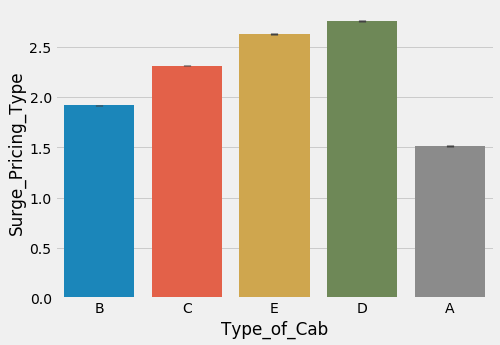

In [85]:
plt.figure(figsize=(7,5))
sns.barplot(train.Type_of_Cab, train.Surge_Pricing_Type)
plt.show()

In [285]:
X = data_train
Y = train["Surge_Pricing_Type"]

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.33, stratify = Y, random_state = 100)

In [187]:
X.shape

(131662, 69)

In [188]:
train_x.shape

(88213, 69)

In [189]:
train_y.shape

(88213,)

In [190]:
train_x.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,pc1,pc2,pc3,pc4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_Missing,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_Missing,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
107899,0.773716,1.127008,0.718293,1.077994,1.299114,0.809841,0.740457,-4.008859,-0.322618,-1.255602,0.752472,1.0,5.713171,10.0,1.525167,3.90625,1.194318,5.527074,6.291711,32.640319,57.131706,8.713542,22.317073,6.823340,31.577115,35.945619,100.0,15.251675,39.0625,11.943176,55.270737,62.917110,2.326136,5.957685,1.821534,8.429713,9.595913,15.258789,4.665303,21.590132,24.576996,1.426395,6.601082,7.514301,30.548544,34.774751,39.585628,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2863,-0.744174,-1.130266,0.098061,-0.478935,0.460360,0.208004,-0.306644,4.027303,0.458836,0.703123,0.240399,1.0,4.071083,2.0,1.483681,2.37875,0.730463,5.426781,5.995517,16.573717,8.142166,6.040187,9.684089,2.973776,22.092875,24.408249,4.0,2.967361,4.7575,1.460926,10.853562,11.991034,2.201308,3.529305,1.083774,8.051609,8.895432,5.658452,1.737589,12.908955,14.261837,0.533576,3.964063,4.379504,29.449950,32.536357,35.946226,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
58746,0.796858,-0.001629,0.207898,-0.266163,-0.860484,0.612340,-0.591500,-0.030827,-0.892272,-0.022776,-0.485173,1.0,5.738206,6.0,1.491027,2.58750,0.000000,5.494161,5.914940,32.927009,34.429236,8.555823,14.847608,0.000000,31.526630,33.941145,36.0,8.946165,15.5250,0.000000,32.964968,35.489640,2.223163,3.858033,0.000000,8.191945,8.819338,6.695156,0.000000,14.216142,15.304907,0.000000,0.000000,0.000000,30.185808,32.497634,34.986515,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100521,-0.274051,-1.694585,0.515920,1.362114,0.460360,1.196013,2.566149,6.024549,0.365009,-1.117012,0.342611,1.0,4.579672,0.0,1.511631,4.18500,0.730463,5.591427,6.808145,20.973398,0.000000,6.922774,19.165928,3.345282,25.606904,31.179075,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,2.285028,6.326175,1.104191,8.452174,10.291403,17.514225,3.056988,23.400123,28.492088,0.533576,4.084331,4.973099,31.264057,38.067249,46.350843,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2063,-0.246096,-0.001629,-1.534178,-0.202459,-0.860484,-1.551510,-1.406125,0.017385,0.233213,0.241280,-0.525470,1.0,4.609915,6.0,1.374501,2.65000,0.000000,5.133567,5.684507,21.251321,27.659493,6.336333,12.216276,0.000000,23.665311,26.205095,36.0,8.247006,15.9000,0.000000,30.801404,34.107040,1.889253,3.642427,0.000000,7.056093,7.813360,7.022500,0.000000,13.603953,15.063943,0.000000,0.000000,0.000000,26.353513,29.181797,32.313616,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [191]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=4,objective = "multi:softmax")
model.fit(train_x,train_y)
pred_train = model.predict(train_x)
print(f"Train Accuracy is {accuracy_score(train_y,pred_train)}")
pred_test = model.predict(test_x)
print(f"Test Accuracy is {accuracy_score(test_y,pred_test)}")
print(f"Classification Report For Test Data is\n{classification_report(test_y,pred_test)}")

Train Accuracy is 0.7161869565710269
Test Accuracy is 0.6998089714377776
Classification Report For Test Data is
              precision    recall  f1-score   support

           1       0.75      0.55      0.63      8981
           2       0.67      0.79      0.73     18720
           3       0.72      0.68      0.70     15748

    accuracy                           0.70     43449
   macro avg       0.71      0.67      0.69     43449
weighted avg       0.70      0.70      0.70     43449



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 <a list of 69 Text xticklabel objects>)

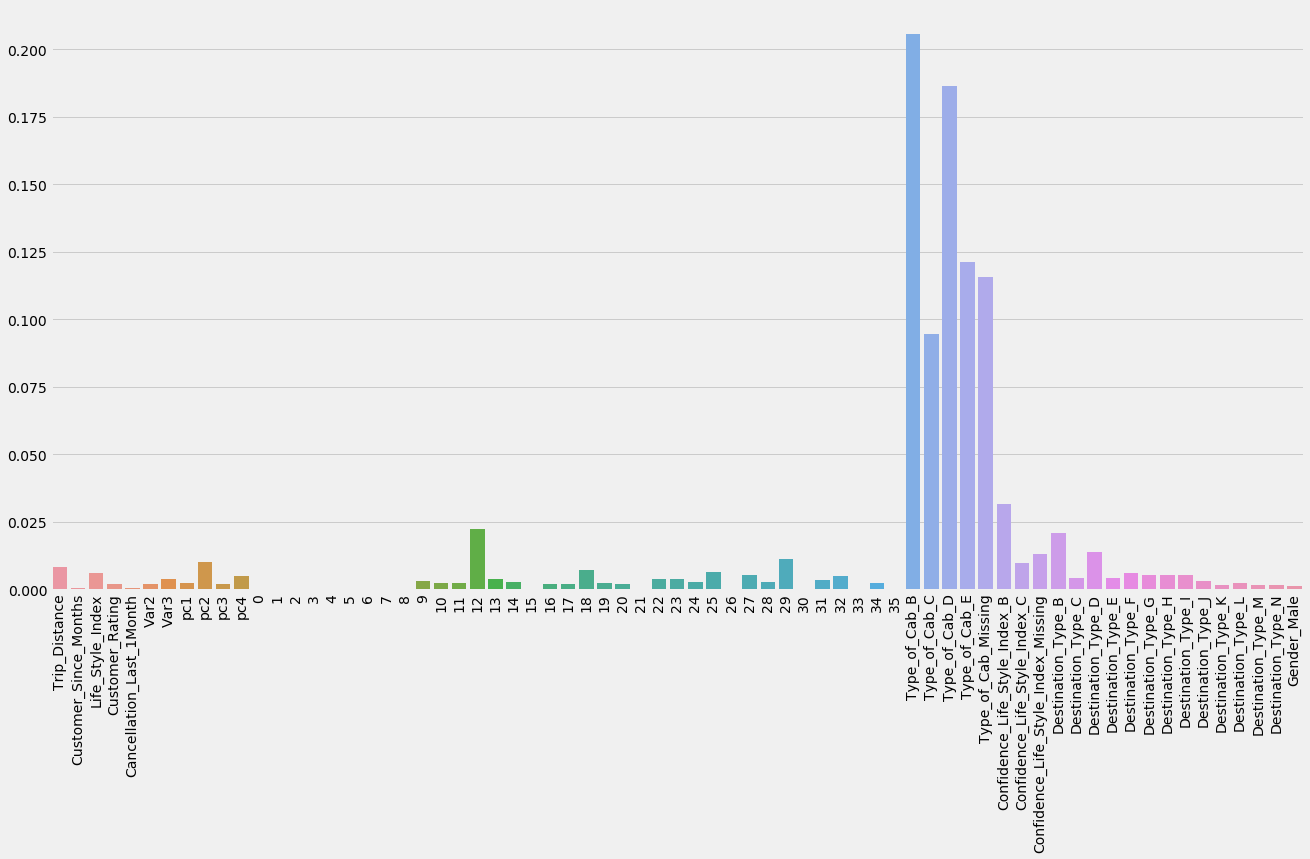

In [192]:
plt.figure(figsize=(20,10))
sns.barplot(X.columns,model.feature_importances_)
plt.xticks(rotation = 90)

In [1]:
# from sklearn.model_selection import train_test_split

# # train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.33, stratify = Y, random_state = 100)

# model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3,objective = "multi:softmax")
# model.fit(X,Y)

In [265]:
pred_train = model.predict(X)
print(f"Train Accuracy is {accuracy_score(Y,pred_train)}")
pred_test = model.predict(data_test)

Train Accuracy is 0.7081086418252799


In [266]:
submission = pd.DataFrame()
submission["Trip_ID"] = test["Trip_ID"]
submission["Surge_Pricing_Type"] = pred_test

submission.to_csv(folder+"submission.csv",index = False)

submission.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,1
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2
